**Entrega realizada por:** Junior Zambrano.

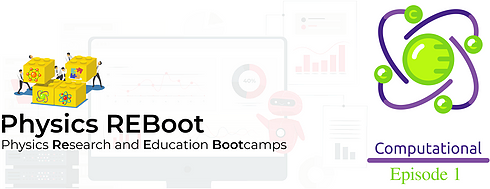

#***El Péndulo Simple***

A continuación se presenta la resolución de las ecuaciones diferenciales asociadas al sistema físico del péndulo simple o péndulo ideal.

El péndulo simple consta de una cuerda de longitud **l** (con masa despreciable) fijo en el extremo superior y con una masa puntual **m** (de dimensión despreciable) en el extremo inferior:

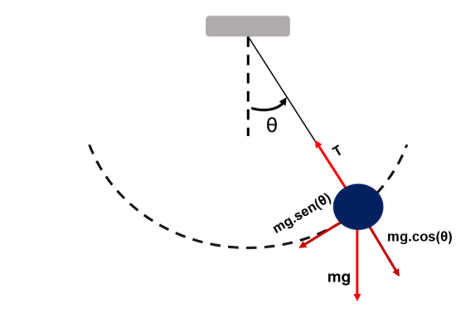

En el sistema hay dos fuerzas involucradas, la tensión **T** y el peso **mg**. 

Para escribir las ecuaciones de movimiento es necesario primero, descomponer las fuerzas de modo de que sean paralelas o perpendiculares al movimiento. En este caso el movimiento esta definido a lo largo de la circunferencia y el eje perpendicular corresponde a la dirección de la cuerda. 

Haciendo uso del diagrama de cuerpo libre presentado anteriormente, y la segunda ley de Newton, escribimos la ecuación correspondiente a la aceleración tangencial:

$F_{Tang}= -mgsen(\theta ) = ma_{Tang}$

donde  $a_{Tang} = l.\ddot{\theta}$

Sustituyendo la segunda ecucación dentro de la primera obtenemos:

$ -gsen(\theta ) = l.\ddot{\theta}$

Con esta información, podemos excribir las ecuaciones de movimiento para definir el sistema, donde:

$ \dot{\theta}= \frac{d\theta}{dt} = \omega $

$ \ddot{\theta}= \frac{d\omega}{dt} = -mg.sen(\theta)/l $

En esta ocasión, nuestra tarea es:

* Crear nuestra propia implementación en Python del *Pendulo Simple* usando la ecuación diferencial presentada anteriormente.

* Ilustrar graficamente la evolución del sistema en función del tiempo




Empezemos por cargar las librerias y paquetes que usaremos:

In [1]:
import numpy as np  #NumPy paquete de computo cientifico, permite hacer arrays y tambien tiene constantes y funciones
from scipy.integrate import solve_ivp #Integracion numerica de un sistema de ecuaciones ordinarias con condiciones iniciales Solve_ivp
import matplotlib.pyplot as plt #Paquete de graficos

**Solve_ivp** requiere como input una función que consiste en las ecuaciones diferenciales a ser resueltas en forma de vector:

El primer paso consiste en definir las variables que van a ser determinadas: 

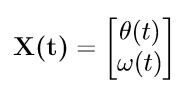

Luego se define la función de sus derivadas, $\dot{X(t)} = f(t,X)$ donde **t** es la variable independiente y **X** el vector que definimos anteriormente. 

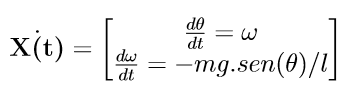

Finalmente, se indican los valores iniciales, de igual manera en forma vectorial:

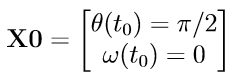

La función se define:

In [2]:
# definir ecucacion de movimiento del pendulo como funcion
def f(t,X):
    g = 9.8 # [m/s^2] 
    l = 2 #[m]
    m = 10 #[Kg]
# Posición angular theta, entrada 0 del vector X
    theta = X[0]
# Velocidad Angular, entrada 1 del vector X
    omega = X[1]
    return np.array([omega, -1*(m * g * np.sin(theta))/l]) #(derivada de X[0], derivada de X[1]), (Velocidad Angular, Aceleracion)

X0 = [np.pi/2, 0] #Condiciones Iniciales en forma de vector [ , ]
results = solve_ivp(f, [0, 10], X0,rtol=1e-8) #funcion, intervalo de tiempo (t0, tf), vector condiciones iniciales, sensitividad?

Finalmente graficamos la solución:


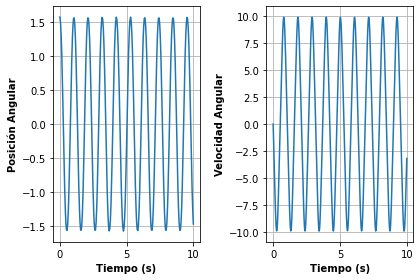

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.plot(results.t, results.y[0]) #Entrada 0 del vector X
ax1.set_ylabel('Posición Angular',fontweight='bold')
ax1.set_xlabel('Tiempo (s)',fontweight='bold')
ax1.grid()
ax2 = fig.add_subplot(1,2,2)
ax2.plot(results.t, results.y[1]) #Entrada 1 del vector X
ax2.set_ylabel('Velocidad Angular', fontweight='bold')
ax2.set_xlabel('Tiempo (s)',fontweight='bold')
ax2.grid()
plt.tight_layout()
